In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data/12_poisson_regression.csv')
df.head()

,year,sex,case,total,ln_total
0,1993,1,1,13783,9.53119
1,1993,2,1,13223,9.48971
2,1994,1,1,12666,9.44668
3,1994,2,2,14842,9.60522
4,1995,1,1,13932,9.54194


In [3]:
df.describe()

,year,sex,case,total,ln_total
count,38.000000,38.000000,38.000000,38.000000,38.000000
mean,2002.000000,1.500000,4.394737,18275.421053,9.799471
std,5.550749,0.506712,2.377137,3059.204813,0.169600
min,1993.000000,1.000000,1.000000,12666.000000,9.446680
25%,1997.250000,1.000000,2.250000,16509.750000,9.711700
50%,2002.000000,1.500000,4.500000,18079.500000,9.802530
75%,2006.750000,2.000000,6.000000,20067.000000,9.906823
max,2011.000000,2.000000,11.000000,24503.000000,10.106550


In [14]:
uniqSex = sorted(df['sex'].unique())
mean_sex = []
for elem in uniqSex:
    mean_sex.append(df[df['sex'] == elem]['case'].mean())
    
std_sex = []
for elem in uniqSex:
    std_sex.append(df[df['sex'] == elem]['case'].std())

mean_sex = np.array(mean_sex)
std_sex = np.array(std_sex)
mean_std = pd.DataFrame(mean_sex, columns=['mean'])
mean_std['SD'] = std_sex

print(mean_std)

       mean        SD
0  3.526316  1.806421
1  5.263158  2.600045


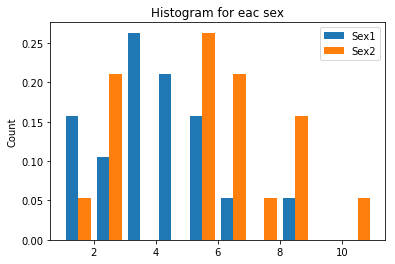

In [13]:
histData = []
for elem in uniqSex:
    histData.append(df[df['sex'] == elem]['case'].values)
    
plt.hist(tuple(histData), bins=10, normed = True, histtype='bar', label=map(lambda x: 'Sex' + str(x), uniqSex))
plt.legend()
plt.ylabel('Count')
plt.title("Histogram for eac sex")
plt.show()

In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import poisson

ml = poisson('case ~ total', data = df).fit()
ml.summary()

Optimization terminated successfully.
         Current function value: 1.873030
         Iterations 28


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                   case   No. Observations:                   38
Model:                        Poisson   Df Residuals:                       36
Method:                           MLE   Df Model:                            1
Date:                Tue, 06 Aug 2019   Pseudo R-squ.:                  0.1650
Time:                        16:20:24   Log-Likelihood:                -71.175
converged:                       True   LL-Null:                       -85.244
Covariance Type:            nonrobust   LLR p-value:                 1.130e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0603      0.501     -2.115      0.034      -2.043      -0.078
total          0.0001   2.54e-05      5.299      0.000    8.47e-05       0.000
==============================================================================
"""

In [7]:
model_fit1 = df
preds_1 = ml.predict()
model_fit1['preds'] = preds_1

model_fit1.head(5)

,year,sex,case,total,ln_total,preds
0,1993,1,1,13783,9.53119,2.209499
1,1993,2,1,13223,9.48971,2.049255
2,1994,1,1,12666,9.44668,1.901399
3,1994,2,2,14842,9.60522,2.547580
4,1995,1,1,13932,9.54194,2.254207
